### Data Exploration and Cleanup Process

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import os
from scipy.stats import linregress


# Import API key
from config import weather_api_key
from config import g_key

#### CSV Files to Pandas Dataframes

In [77]:
# Importing csv files and creating data frames

# CO2 by Country
co2_country_df = pd.read_csv("project-1-data/co2_emission.csv")

# GDP by Country (GPD per capita PPP)
gdp_country_df = pd.read_csv("project-1-data/GDP-countries-1990-2018.csv")


In [ ]:
# State Income and Emissions 

# Create path
emission_data_path = "project-1-data/carbon_emission_data.csv"
income_data_path ="project-1-data/median_income_2018.csv"
energy_source_path = "project-1-data/energy_by_source.csv"

# Read csv files
state_emissions_2018 = pd.read_csv(emission_data_path)
state_income_2018 = pd.read_csv(income_data_path)
energy_source_df = pd.read_csv(energy_source_path)

In [71]:
# Data preview
co2_country_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [72]:
# Data preview
gdp_country_df.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [73]:
# Data preview
state_emissions_2018.head()

,State,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Federal offshore production is not included in the Production Shares.
0,WY,8.1,3,967,1,8651,1,NaN
1,ND,4.4,6,872,3,8097,2,NaN
2,AK,1.5,13,830,4,8060,3,NaN
3,LA,3.7,8,945,2,7537,4,NaN
4,TX,21.3,1,498,6,5345,5,NaN


In [74]:
# Data preview
state_income_2018.head()

,State,Median income,Standard error
0,United States,"63,179",420
1,Alabama,"49,936","2,423"
2,Alaska,"68,734","3,390"
3,Arizona,"62,283","2,291"
4,Arkansas,"49,781","2,108"


In [76]:
# Data preview
energy_source_df.head()

,Coal,Natural Gas,Crude Oil,Natural Gas Plant Liquids,Nuclear,Renewables
Year,,,,,,
2018,15.3634,31.6899,22.8897,5.727,8.4381,11.5084


#### Cleaning GDP Country Dataframe

In [10]:
# Checking column names and getting rid of any trailing spaces for gdp dataframe

gdp_country_df.columns

gdp_country_df = gdp_country_df.rename(columns = {"Country " : "Country"})

In [11]:
# Taking a subset of original gdp data frame for only the year 2016 
gdp_country_2016_df = gdp_country_df[["Country", "2016"]]

# Renaming column to be more descriptive
gdp_country_2016_df = gdp_country_2016_df.rename(columns = {"2016" : "gdp_2016"})
gdp_country_2016_df.head()

,Country,gdp_2016
0,Aruba,38390.271650
1,Afghanistan,1896.992520
2,Angola,6756.935074
3,Albania,11868.178970
4,Arab World,16935.383300


#### Cleaning Country CO<sub>2</sub> Emissions Dataframe

In [78]:
# Checking column names for CO2 emissions
co2_country_df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [79]:
# Checking for strange observations 
co2_country_df.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
 

In [80]:
# Removing any strange observations found

co2_country_df = co2_country_df[(co2_country_df.Entity != 'Africa') &
                                (co2_country_df.Entity != 'Americas (other)') &
                                (co2_country_df.Entity != 'Antarctic Fisheries') &
                                (co2_country_df.Entity != 'Asia and Pacific (other)') &
                                (co2_country_df.Entity != 'EU-28') &
                                (co2_country_df.Entity != 'Europe (other)') &
                                (co2_country_df.Entity != 'International transport') &
                                (co2_country_df.Entity != 'Statistical differences') &
                                (co2_country_df.Entity != 'World')]


In [81]:
# Double checking that observations were removed
co2_country_df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Republic of the Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salva

In [82]:
# Only keeping observation years 1991 and onwards
co2_country_df = co2_country_df.loc[(co2_country_df.Year >= 1991), :]
co2_country_df = co2_country_df.rename(columns = {"Entity" : "Country", "Annual CO₂ emissions (tonnes )" : "annual_co2_tonnes"})
co2_country_df.head()

,Country,Code,Year,annual_co2_tonnes
42,Afghanistan,AFG,1991,2426486.16
43,Afghanistan,AFG,1992,1381521.84
44,Afghanistan,AFG,1993,1333837.11
45,Afghanistan,AFG,1994,1282488.38
46,Afghanistan,AFG,1995,1231139.65


In [17]:
# Extracting data for the year 2016
co2_country_2016_df = co2_country_df.loc[(co2_country_df.Year == 2016), :]
co2_country_2016_df.head()

,Country,Code,Year,annual_co2_tonnes
67,Afghanistan,AFG,2016,1.225791e+07
419,Albania,ALB,2016,6.272858e+06
527,Algeria,DZA,2016,1.503780e+08
822,Andorra,AND,2016,5.115068e+05
890,Angola,AGO,2016,3.535100e+07


In [18]:
# Merging GDP data with carbon emissions data
co2_gdp_merge_df = co2_country_2016_df.merge(gdp_country_2016_df, how = 'inner', on = "Country")
co2_gdp_merge_df.head()

,Country,Code,Year,annual_co2_tonnes,gdp_2016
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520
1,Albania,ALB,2016,6.272858e+06,11868.178970
2,Algeria,DZA,2016,1.503780e+08,15036.364150
3,Angola,AGO,2016,3.535100e+07,6756.935074
4,Antigua and Barbuda,ATG,2016,5.653968e+05,23670.302260


#### Data Visualization for CO2 Emissions

In [23]:
# Getting bottom 10 emitters
bottom_df = co2_country_2016_df.sort_values(by='annual_co2_tonnes', ascending=True)
bottom_df = bottom_df.iloc[:10]
bottom_df.head()

,Country,Code,Year,annual_co2_tonnes
15790,Saint Helena,SHN,2016,11697.86
14063,Niue,NIU,2016,12132.75
19206,Tuvalu,TUV,2016,12132.75
20351,Wallis and Futuna Islands,NaN,2016,24265.49
12976,Montserrat,MSR,2016,50690.75


In [22]:
# Getting top 10 emitters
top_df = co2_country_2016_df.sort_values(by='annual_co2_tonnes', ascending=False)
top_df = top_df.iloc[:10]
top_df.head()

,Country,Code,Year,annual_co2_tonnes
4483,China,CHN,2016,9.704479e+09
19926,United States,USA,2016,5.310861e+09
12734,Middle East,NaN,2016,2.567181e+09
9458,India,IND,2016,2.377448e+09
15693,Russia,RUS,2016,1.668070e+09


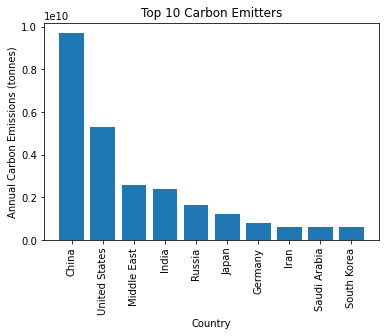

In [65]:
# Bar plot for Top Emitters
plt.bar(top_df['Country'],top_df['annual_co2_tonnes'])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.title("Top 10 Carbon Emitters")
plt.savefig("output-data/images/top-emitters.png")
plt.show()

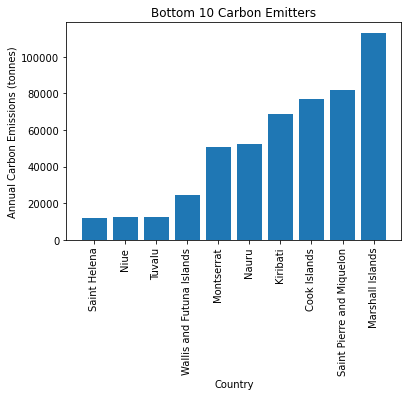

In [67]:
# Bar plot for Bottom Emitters
plt.bar(bottom_df['Country'],bottom_df['annual_co2_tonnes'])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.title("Bottom 10 Carbon Emitters")
plt.savefig("output-data/images/bottom-emitters.png")
plt.show()

In [30]:
# Getting data for specific countries
combined_df_kiribati = co2_country_df.loc[co2_country_df['Country'] == 'Kiribati']
combined_df_us = co2_country_df.loc[co2_country_df['Country'] == 'United States']
combined_df_china = co2_country_df.loc[co2_country_df['Country'] == 'China']
combined_df_india = co2_country_df.loc[co2_country_df['Country'] == 'India']
combined_df_japan = co2_country_df.loc[co2_country_df['Country'] == 'Japan']
combined_df_germany = co2_country_df.loc[co2_country_df['Country'] == 'Germany']
combined_df_russia = co2_country_df.loc[co2_country_df['Country'] == 'Russia']
china_max = combined_df_china['annual_co2_tonnes'].max()

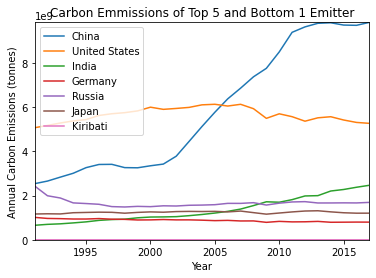

In [68]:
#plotted the emissions by country for the top 5 and lowest one across time to show a trend
#developed nations have trended down while developing nations are exploding
x_axis = combined_df_china['Year']
y_axis = combined_df_china['annual_co2_tonnes']
plt.plot(x_axis,y_axis,label = 'China')

x_axis1 = combined_df_us['Year']
y_axis1 = combined_df_us['annual_co2_tonnes']
plt.plot(x_axis1,y_axis1, label = 'United States')

x_axis2 = combined_df_india['Year']
y_axis2 = combined_df_india['annual_co2_tonnes']
plt.plot(x_axis2,y_axis2, label = 'India')

x_axis3 = combined_df_germany['Year']
y_axis3 = combined_df_germany['annual_co2_tonnes']
plt.plot(x_axis3,y_axis3,label = 'Germany')

x_axis4 = combined_df_russia['Year']
y_axis4 = combined_df_russia['annual_co2_tonnes']
plt.plot(x_axis4,y_axis4, label = 'Russia')

x_axis5 = combined_df_japan['Year']
y_axis5 = combined_df_japan['annual_co2_tonnes']
plt.plot(x_axis5,y_axis5, label = 'Japan')

x_axis6 = combined_df_kiribati['Year']
y_axis6 = combined_df_kiribati['annual_co2_tonnes']
plt.plot(x_axis6,y_axis6, label = 'Kiribati')

plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(0,china_max)
plt.xlabel('Year')
plt.ylabel('Annual Carbon Emissions (tonnes)')
plt.title("Carbon Emmissions of Top 5 and Bottom 1 Emitter")
plt.legend()
plt.savefig("output-data/images/top-bottom-lineplot.png")
plt.show()

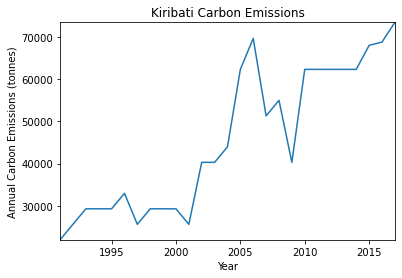

In [83]:
#plotted kiribati to its own scale to show how it trends up but compared to china it looks like nothing
combined_df_kiribati = co2_country_df.loc[co2_country_df['Country'] == 'Kiribati']
x_axis6 = combined_df_kiribati['Year']
y_axis6 = combined_df_kiribati['annual_co2_tonnes']
plt.plot(x_axis6,y_axis6)
plt.xlabel('Year')
plt.ylabel('Annual Carbon Emissions (tonnes)')
plt.title("Kiribati Carbon Emissions")
plt.xlim(x_axis6.min(),x_axis6.max())
plt.ylim(y_axis6.min(),y_axis6.max())
plt.savefig("output-data/images/kiribati-emissions.png")
plt.show()

#### Geocode API Calls and Heat Maps

In [39]:
# Creating empty columns
co2_gdp_merge_df['Lat'] = ""
co2_gdp_merge_df['Lng'] = ""

# Geocode
for index, row in co2_gdp_merge_df.iterrows():
    
    country = row.Country
    
    # Build the endpoint URL
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={g_key}"
    try:
        # Get json and extract latitude and longitude
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        co2_gdp_merge_df.loc[index, 'Lat'] = lat
        co2_gdp_merge_df.loc[index, 'Lng'] = lng
        print(f"{country} found, adding coordinates")
    except:
        
        print("Could not find country.")

    
co2_gdp_merge_df.head()

Afghanistan found, adding coordinates
Albania found, adding coordinates
Algeria found, adding coordinates
Angola found, adding coordinates
Antigua and Barbuda found, adding coordinates
Argentina found, adding coordinates
Armenia found, adding coordinates
Aruba found, adding coordinates
Australia found, adding coordinates
Austria found, adding coordinates
Azerbaijan found, adding coordinates
Bahrain found, adding coordinates
Bangladesh found, adding coordinates
Barbados found, adding coordinates
Belarus found, adding coordinates
Belgium found, adding coordinates
Belize found, adding coordinates
Benin found, adding coordinates
Bermuda found, adding coordinates
Bhutan found, adding coordinates
Bolivia found, adding coordinates
Bosnia and Herzegovina found, adding coordinates
Botswana found, adding coordinates
Brazil found, adding coordinates
British Virgin Islands found, adding coordinates
Bulgaria found, adding coordinates
Burkina Faso found, adding coordinates
Burundi found, adding coor

,Country,Code,Year,annual_co2_tonnes,gdp_2016,Lat,Lng
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520,33.9391,67.71
1,Albania,ALB,2016,6.272858e+06,11868.178970,41.1533,20.1683
2,Algeria,DZA,2016,1.503780e+08,15036.364150,28.0339,1.65963
3,Angola,AGO,2016,3.535100e+07,6756.935074,-11.2027,17.8739
4,Antigua and Barbuda,ATG,2016,5.653968e+05,23670.302260,17.0608,-61.7964


In [40]:
# Store lat and long in locations, gdps in gdps, and carbon emissions in carbons
locations = co2_gdp_merge_df[["Lat", "Lng"]]
gdps = co2_gdp_merge_df.gdp_2016
carbons = co2_gdp_merge_df.annual_co2_tonnes

#### Global GDP Heat Map

In [41]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=gdps, 
                                 dissipating=False, max_intensity=max(gdps),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

#### Global Carbon Emissions Heat Map

In [42]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=carbons, 
                                 dissipating=False, max_intensity=1*(10**9),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

#### BRIC Countries Data Cleaning

In [43]:
# Import BRIC Historic climate csv into pandas dataframe
bric_climate_df = pd.read_csv("project-1-data/BRIC-climate-1991-2016.csv")
bric_climate_df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,25.6309,1991,Jan Average,Brazil,BRA
1,25.9331,1991,Feb Average,Brazil,BRA
2,25.6195,1991,Mar Average,Brazil,BRA
3,25.3122,1991,Apr Average,Brazil,BRA
4,24.6685,1991,May Average,Brazil,BRA


In [44]:
# Checking column names and fixing irregularities
bric_climate_df.columns

bric_climate_df = bric_climate_df.rename(columns = {"Temperature - (Celsius)" : "Temperature_C",
                                                    " Year" : "Year",
                                                    " Statistics" : "Statistics",
                                                    " Country" : "Country",
                                                    " ISO3" : "Code"})

bric_climate_df = bric_climate_df[["Country", "Year", "Code", "Temperature_C"]]
bric_climate_df.head()

,Country,Year,Code,Temperature_C
0,Brazil,1991,BRA,25.6309
1,Brazil,1991,BRA,25.9331
2,Brazil,1991,BRA,25.6195
3,Brazil,1991,BRA,25.3122
4,Brazil,1991,BRA,24.6685


In [45]:
# Groupby country and year to get max

bric_groupby = bric_climate_df.groupby(by = ["Country", "Year"])
bric_max_temp = bric_groupby.max()
bric_max_temp.head(40)

bric_max_temp[["Temperature_C", "Code"]].head()

Temperature_C  Code
Country Year                     
 Brazil 1991        26.0139   BRA
        1992        25.7539   BRA
        1993        26.0299   BRA
        1994        26.1762   BRA
        1995        26.1650   BRA

In [46]:
# Resetting index of BRIC temperature dataframe
bric_temp_df = bric_max_temp.reset_index()

# Removing leading space in country and code values of BRIC dataframe
bric_temp_df.Country = [country.strip() for country in bric_temp_df.Country]
bric_temp_df.Code = [code.strip() for code in bric_temp_df.Code]

In [47]:
# Merging BRIC emissions with BRIC temperatures
bric_merge_df = bric_temp_df.merge(co2_country_df, how = 'left', on = ['Country', 'Year', 'Code'])
bric_merge_df.head()

# Export dataframe as csv
bric_merge_df.to_csv("output-data/bric-merge-data.csv")

#### Interactive Barplot for BRIC Countries

Please select a year between 1991 and 2016:2016


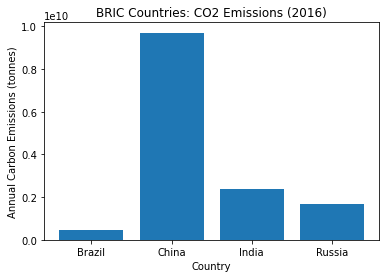

In [85]:
# BarPlot of Carbon Emissions for a Given Year

# Get user input for year of interest
year_of_interest = input("Please select a year between 1991 and 2016:")

# Subset data for given year
bar_data = bric_merge_df.loc[bric_merge_df.Year == int(year_of_interest), :]

# Creating barplot
plt.bar(bar_data.Country, bar_data.annual_co2_tonnes)
plt.title(f"BRIC Countries: CO2 Emissions ({year_of_interest})")
plt.xlabel("Country")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.savefig(f"output-data/images/bric-emissions-{year_of_interest}.png")
plt.show()

#### State Emissions and Income Dataframe Cleaning

For the first couple of dataframes, the state names had to be replaced using a state abbreviation dictionary in order to merge the datasets, commas had to be removed from the median income data and converted to integers so that the data could be read for plotting.


In [49]:
# Replace abbreviated state names with dictionary
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

state_emissions_2018 = state_emissions_2018.replace({"State": abbrev_us_state})

In [50]:
# Merge dataframes
merge_df = pd.merge(state_emissions_2018, state_income_2018, how="outer", on="State")
merge_df = merge_df.drop(columns=["Federal offshore production is not included in the Production Shares."])
merge_df = merge_df.drop(index=51)

# Remove commas from median income data
merge_df["Median income"] = merge_df["Median income"].str.replace(",","")
merge_df["Median income"] = merge_df["Median income"].astype(int)
merge_df.head()

,State,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Median income,Standard error
0,Wyoming,8.1,3.0,967.0,1.0,8651.0,1.0,62539,"3,892"
1,North Dakota,4.4,6.0,872.0,3.0,8097.0,2.0,66505,"3,095"
2,Alaska,1.5,13.0,830.0,4.0,8060.0,3.0,68734,"3,390"
3,Louisiana,3.7,8.0,945.0,2.0,7537.0,4.0,49973,"1,754"
4,Texas,21.3,1.0,498.0,6.0,5345.0,5.0,59785,"1,372"


#### Barplot Visualization for State Emissions and Income Data

In [51]:
# Create variables for different value sets 
state_name = merge_df["State"].unique()
us_co2_production = merge_df["Production, U.S. Share"].astype(int)
median_income = merge_df["Median income"].astype(int)
co2_per_capita = merge_df["Consumption per Capita, Million Btu"].tolist()

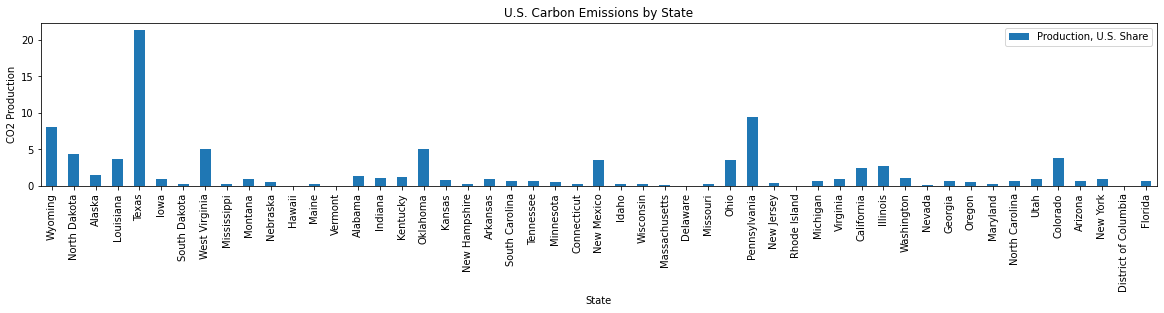

In [86]:
#create dataframe for plotting
state_emissions_df = merge_df[["State", "Production, U.S. Share"]]
state_emissions_df = state_emissions_df.set_index("State")

#plot state vs. emissions data
state_emissions_df.plot(kind='bar', figsize=(20,3))
plt.ylabel("CO2 Production")
plt.title("U.S. Carbon Emissions by State")
plt.savefig("output-data/images/carbon-emissions-2018-state.png")
plt.show()

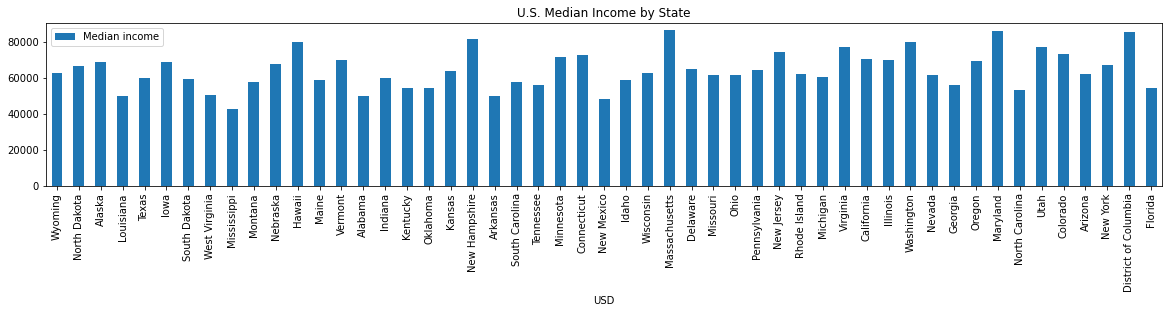

In [88]:
#create dataframe for plotting
state_median_df = merge_df[["State", "Median income"]]
state_median_df = state_median_df.set_index("State")

#plot state vs. median income data
state_median_df.plot(kind='bar', figsize=(20,3))
plt.xlabel("USD")
plt.title("U.S. Median Income by State")
plt.savefig("output-data/images/median-income-2018-state.png")
plt.show()

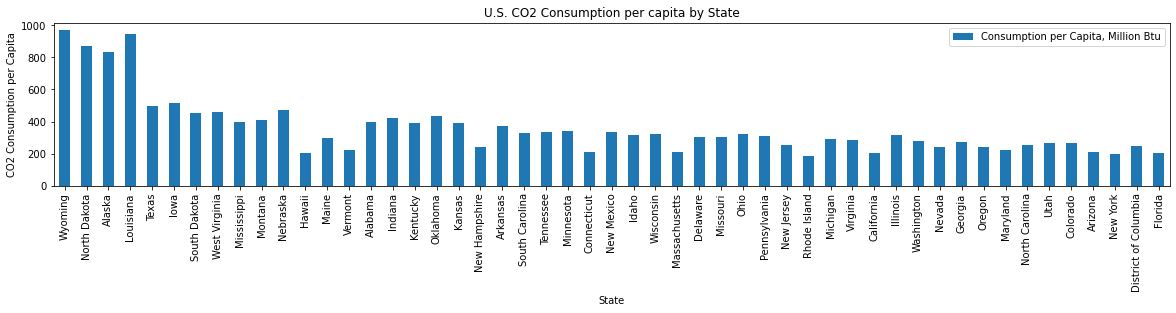

In [89]:
#create dataframe for plotting
state_co2_per_capita = merge_df[["State", "Consumption per Capita, Million Btu"]]
state_co2_per_capita = state_co2_per_capita.set_index("State")

#plot 
state_co2_per_capita.plot(kind='bar', figsize=(20,3))
plt.ylabel("CO2 Consumption per Capita")
plt.title("U.S. CO2 Consumption per capita by State")
plt.savefig("output-data/images/us-co2-per-capita.png")
plt.show()

#### U.S. Energy Source Data

In [62]:
energy_source_df.columns = ["Year", "Coal", "Natural Gas", "Crude Oil",
                  "Natural Gas Plant Liquids", "Nuclear",
                  "Renewables"]
energy_source_df.head()

,Year,Coal,Natural Gas,Crude Oil,Natural Gas Plant Liquids,Nuclear,Renewables
0,1950,14.0601,6.2330,11.4467,0.8250,0.0,2.9777
1,1951,14.4193,7.4157,13.0367,0.9226,0.0,2.9585
2,1952,12.7343,7.9636,13.2810,1.0000,0.0,2.9402
3,1953,12.2777,8.3388,13.6711,1.0643,0.0,2.8315
4,1954,10.5424,8.6818,13.4269,1.1159,0.0,2.7541


In [63]:
#create dataframe f0r 2018 energy source data 
energy_source_df = energy_source_df.loc[energy_source_df["Year"] == 2018]
energy_source_df = energy_source_df.drop_duplicates(subset=None)
energy_source_df = energy_source_df.set_index("Year")



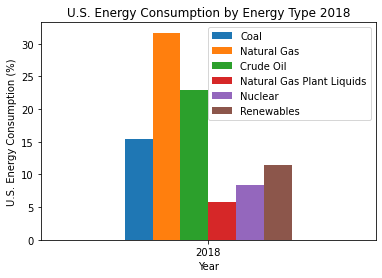

In [90]:
#create bar graph 
energy_source_data.plot(kind='bar')
plt.ylabel("U.S. Energy Consumption (%)")
plt.title("U.S. Energy Consumption by Energy Type 2018")
plt.xticks(rotation="horizontal")
plt.savefig("output-data/images/us-energy-by-type.png")
plt.show()